# Bayesian Neural Network with MCDropout

In [1]:
# Bayes Nets Package
import kassandra
import model_viz as mv

# For generating and visualizing data
import numpy as np
import generate_data as gd
import model_viz as mv
from visuals import regression
import matplotlib.pyplot as plt

In [2]:
x_train, x_test, \
y_train, y_test, \
x_true, y_true = gd.get_data(N=500, 
                             limits=(-10, 10), 
                             missing_data=False, 
                             heteroscedastic=True)

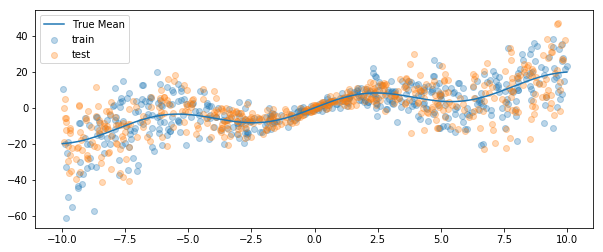

In [3]:
mv.demo_plot(x_train, y_train, x_test, y_test, x_true, y_true)

In [11]:
model = kassandra.models.BNDropout(layers=2, 
                                   units=50, 
                                   activation="tanh",
                                   dropout_rate=0.3,
                                   lengthscale=2,
                                   num_train_samples=x_train.shape[0])

model.fit(x_train, 
          y_train, 
          epochs=60000, 
          shuffle=True, 
          minibatches = 3)

Elapsed time: 40.56s


(10, 100)
(10, 2, 100)


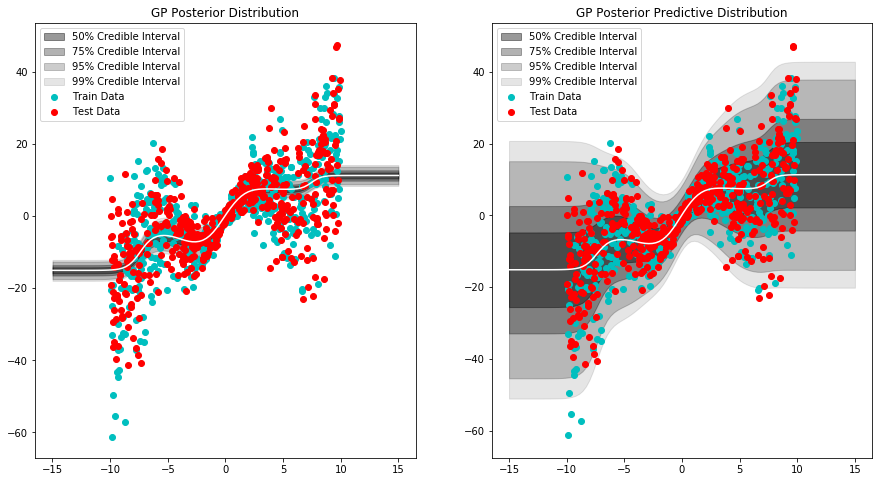

In [12]:
# generate data to plot prior of model
x = np.linspace(-15,15,100)

plt.figure(figsize=(15, 8))

mean, var = model.get_posterior(x)

# plot prior 
plt.subplot(121)
plt.title("GP Posterior Distribution")
regression.plot_1d(x,mean,var)
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.legend()

mean, var = model.get_posterior_predictive(x)

# plot prior predictive 
plt.subplot(122)
plt.title("GP Posterior Predictive Distribution")
regression.plot_1d(x,mean,var)
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.legend()
plt.show()